In [26]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')
import plotly.graph_objs as go
import plotly.express as px
from plotly.subplots import make_subplots
# Load the first dataset
academic_detail_df = pd.read_csv('academic_detail.csv')
# Load the second dataset
academic_df = pd.read_csv('academic.csv')

# Display the first few rows of the dataset
academic_df.head()

# Display the first few rows of the dataset
academic_detail_df.head()


,year,academic_type,academic_level,students
0,1999/00,Undergraduate,Associate's,59830
1,1999/00,Undergraduate,Bachelor's,177381
2,1999/00,Graduate,Master's,110857
3,1999/00,Graduate,Doctoral,72928
4,1999/00,Graduate,Professional,9475


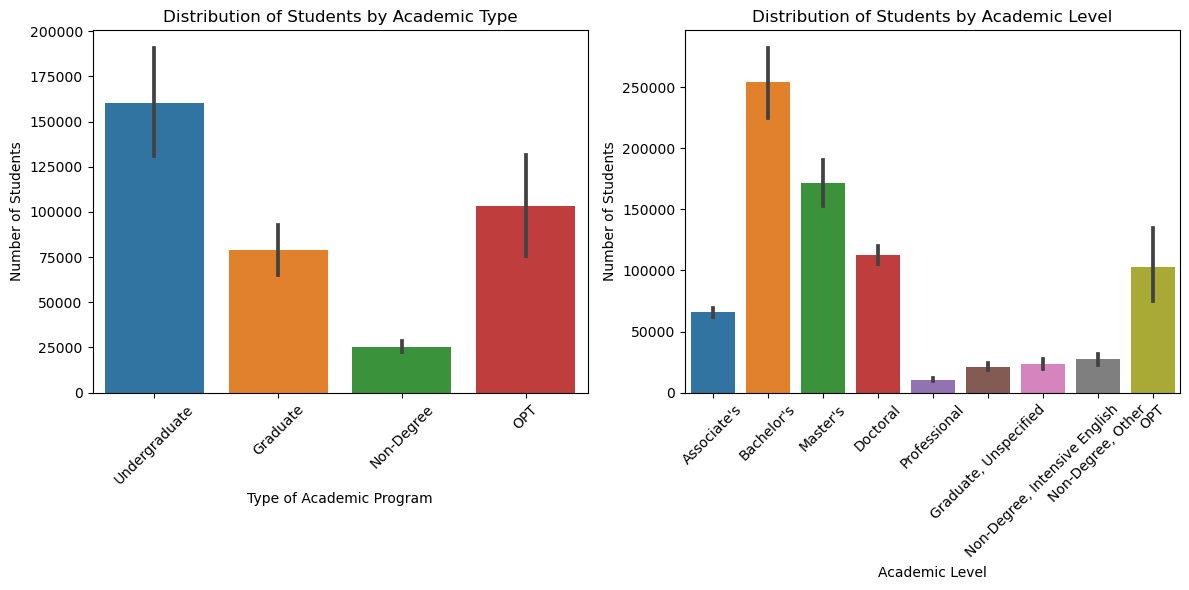

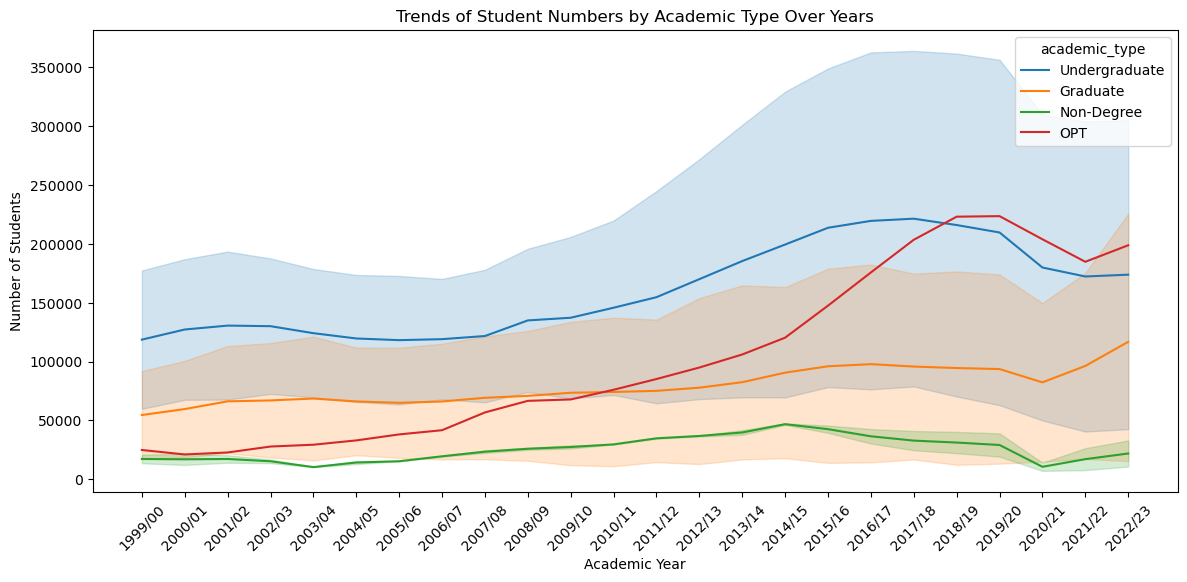

,students
count,216.000000
mean,87870.342593
std,86799.205915
min,7093.000000
25%,20776.500000
50%,58298.000000
75%,132951.750000
max,363927.000000


In [27]:
# Basic statistics
basic_stats = academic_detail_df.describe()

# Visualizations
# Plotting the distribution of students in different academic types and levels
plt.figure(figsize=(12, 6))

plt.subplot(1, 2, 1)
sns.barplot(x='academic_type', y='students', data=academic_detail_df)
plt.ylabel('Number of Students')
plt.xlabel('Type of Academic Program')
plt.title('Distribution of Students by Academic Type')
plt.savefig('distribution.png')
plt.xticks(rotation=45)

plt.subplot(1, 2, 2)
sns.barplot(x='academic_level', y='students', data=academic_detail_df)
plt.ylabel('Number of Students')
plt.xlabel('Academic Level')
plt.title('Distribution of Students by Academic Level')
plt.xticks(rotation=45)

plt.tight_layout()
plt.savefig('distribution0.png')
plt.show()

# Trends over the years
plt.figure(figsize=(14, 6))
sns.lineplot(x='year', y='students', hue='academic_type', data=academic_detail_df)
plt.ylabel('Number of Students')
plt.xlabel('Academic Year')
plt.title('Trends of Student Numbers by Academic Type Over Years')
plt.xticks(rotation=45)
plt.savefig('trends.png')
plt.show()

basic_stats


In [28]:

# Trends of Student Numbers at Different Academic Levels Over the Years
fig = px.line(academic_detail_df, x='year', y='students', color='academic_level', title='Trends of Student Numbers by Academic Level Over Years')
fig.show()

import plotly.graph_objs as go

# Proportion of Students in Each Academic Type and Level
# Calculating proportions
academic_type_proportions = academic_detail_df.groupby('academic_type')['students'].sum() / academic_detail_df['students'].sum()
academic_level_proportions = academic_detail_df.groupby('academic_level')['students'].sum() / academic_detail_df['students'].sum()

# Visualizing proportions
fig = go.Figure()

fig.add_trace(go.Pie(labels=academic_type_proportions.index, values=academic_type_proportions, name='Type', domain=dict(x=[0, 0.5]), hole=0.3, marker=dict(line=dict(color='#000000', width=2))))
fig.add_trace(go.Pie(labels=academic_level_proportions.index, values=academic_level_proportions, name='Level', domain=dict(x=[0.5, 1]), hole=0.3, marker=dict(line=dict(color='#000000', width=2))))

fig.update_layout(title_text='Proportion of Students by Academic Type and Level', annotations=[dict(text='     Type', x=0.18, y=0.5, font_size=20, showarrow=False), dict(text='Level', x=0.78, y=0.5, font_size=20, showarrow=False)])
fig.show()

In [29]:
# Display the first few rows of the dataset
academic_df.head()

,year,students,us_students,undergraduate,graduate,non_degree,opt
0,1948/49,25464,2403400.0,NaN,NaN,NaN,NaN
1,1949/50,26433,2445000.0,NaN,NaN,NaN,NaN
2,1950/51,29813,2281000.0,NaN,NaN,NaN,NaN
3,1951/52,30462,2102000.0,NaN,NaN,NaN,NaN
4,1952/53,33675,2134000.0,NaN,NaN,NaN,NaN


In [30]:
import plotly.graph_objs as go

# Extracting the start year and converting it to an integer for grouping
academic_df['start_year'] = academic_df['year'].apply(lambda x: int(x.split('/')[0]))

# Creating 10-year buckets
academic_df['year_bucket'] = pd.cut(academic_df['start_year'], bins=range(1940, 2040, 10), right=False)

# Ensure the 'year_bucket' column is added correctly
print("Check if 'year_bucket' is in columns:", 'year_bucket' in academic_df.columns)

# Grouping the data by 10-year buckets and calculating the sum for each category
grouped_data = academic_df.groupby('year_bucket').sum()[['undergraduate', 'graduate', 'non_degree', 'opt']]

# Converting the 'year_bucket' column to string for plotting
grouped_data['year_bucket_str'] = grouped_data.index.astype(str)

# Visualizing the trends in the 10-year buckets for each category
fig = go.Figure()

# Dictionary to map old labels to new labels
labels_dict = {'undergraduate': 'Undergraduate Level', 'graduate': 'Graduate Level', 'non_degree': 'Non-Degree Level', 'opt': 'OPT Level'}

# Plot for each category
for category in ['undergraduate', 'graduate', 'non_degree', 'opt']:
    fig.add_trace(go.Scatter(x=grouped_data['year_bucket_str'], y=grouped_data[category], mode='lines+markers', name=labels_dict[category], marker=dict(symbol='circle-open')))

# Improve written labels and add legend outline
fig.update_layout(title='Trends in Student Categories Over 10-Year Buckets', xaxis_title='Year Bucket', yaxis_title='Number of Students', legend=dict(bordercolor='Black', borderwidth=2))

fig.show()


Check if 'year_bucket' is in columns: True


In [31]:
import plotly.graph_objs as go

# Calculating the year-over-year growth rate of international students
academic_df['students_growth'] = academic_df['students'].pct_change() * 100

# Removing the first row as the growth rate calculation is not meaningful for the first year
academic_df_growth = academic_df.dropna(subset=['students_growth'])

# Visualizing the year-over-year growth rate
fig = go.Figure()

fig.add_trace(go.Scatter(x=academic_df_growth['start_year'], y=academic_df_growth['students_growth'], mode='lines+markers', name='Growth Rate', marker=dict(symbol='circle-open')))

# Improve written labels
fig.update_layout(title='Year-Over-Year Growth Rate of International Students', xaxis_title='Year', yaxis_title='Growth Rate (%)')

fig.show()

# Showing first few rows of the growth data
print(academic_df_growth[['year', 'students', 'students_growth']].head())


      year  students  students_growth
1  1949/50     26433         3.805372
2  1950/51     29813        12.787046
3  1951/52     30462         2.176903
4  1952/53     33675        10.547567
5  1953/54     33833         0.469191


In [32]:
import plotly.graph_objects as go

# Preparing the data for the dumbbell plot
previous_year = academic_df_growth['start_year'][:-1].reset_index(drop=True)
current_year = academic_df_growth['start_year'][1:].reset_index(drop=True)
previous_year_growth = academic_df_growth['students_growth'][:-1].reset_index(drop=True)
current_year_growth = academic_df_growth['students_growth'][1:].reset_index(drop=True)

# Creating the dumbbell plot
fig = go.Figure()

# Lines for each pair of years
for i in range(len(previous_year)):
    fig.add_trace(go.Scatter(x=[previous_year_growth[i], current_year_growth[i]],
                             y=[previous_year[i], current_year[i]],
                             mode='lines',
                             line_color='grey',
                             name='Growth Line',  # Custom name for the line
                             showlegend=(i == 0)))  # Show legend only for the first line

# Points for each year
fig.add_trace(go.Scatter(x=previous_year_growth, y=previous_year, mode='markers', name='Previous Year', marker=dict(color='blue', size=10)))
fig.add_trace(go.Scatter(x=current_year_growth, y=current_year, mode='markers', name='Current Year', marker=dict(color='red', size=10)))

fig.update_layout(title='Dumbbell Plot of Year-over-Year Growth Rate of International Students', xaxis_title='Growth Rate (%)', yaxis_title='Year', yaxis=dict(type='category'))
fig.show()  


In [33]:
import plotly.graph_objs as go

# Calculating the ratio of international students to U.S. students
academic_df['international_us_ratio'] = academic_df['students'] / academic_df['us_students']

# Visualizing the ratio over the years
fig = go.Figure()

fig.add_trace(go.Scatter(x=academic_df['start_year'], y=academic_df['international_us_ratio'], mode='lines+markers', name='International to U.S. Ratio', marker=dict(symbol='circle-open')))

# Improve written labels
fig.update_layout(title='Ratio of International Students to U.S. Students Over the Years', xaxis_title='Year', yaxis_title='Ratio of International to U.S. Students')

fig.show()

# Showing first few rows of the ratio data
print(academic_df[['year', 'students', 'us_students', 'international_us_ratio']].head())


      year  students  us_students  international_us_ratio
0  1948/49     25464    2403400.0                0.010595
1  1949/50     26433    2445000.0                0.010811
2  1950/51     29813    2281000.0                0.013070
3  1951/52     30462    2102000.0                0.014492
4  1952/53     33675    2134000.0                0.015780


In [34]:
# Preparing the data for the dumbbell plot
previous_year_ratio = academic_df['international_us_ratio'][:-1].reset_index(drop=True)
current_year_ratio = academic_df['international_us_ratio'][1:].reset_index(drop=True)

# Creating the dumbbell plot
fig = go.Figure()

# Lines for each pair of years
for i in range(len(previous_year)):
    fig.add_trace(go.Scatter(x=[previous_year_ratio[i], current_year_ratio[i]],
                             y=[previous_year[i], current_year[i]],
                             mode='lines',
                             line_color='grey',
                             name='Ratio Line',  # Custom name for the line
                             showlegend=(i == 0)))  # Show legend only for the first line

# Points for each year
fig.add_trace(go.Scatter(x=previous_year_ratio, y=previous_year, mode='markers', name='Start of the Period', marker=dict(color='blue', size=10)))
fig.add_trace(go.Scatter(x=current_year_ratio, y=current_year, mode='markers', name='Next Year', marker=dict(color='red', size=10)))

fig.update_layout(title='Dumbbell Plot of Ratio of International Students to U.S. Students', xaxis_title='Ratio', yaxis_title='Year', yaxis=dict(type='category'))
fig.show()  


In [35]:
# Load the 'field_of_study.csv' dataset
field_of_study_df = pd.read_csv('field_of_study.csv')

# Display the first few rows of the dataset
field_of_study_df.head()


,year,field_of_study,major,students
0,1998/99,Agriculture,Agriculture,6146.0
1,1998/99,Agriculture,Natural Resources and Conservation,1803.0
2,1998/99,Business and Management,Business and Management,101360.0
3,1998/99,Communications and Journalism,"Communication, Journalism",9473.0
4,1998/99,Communications and Journalism,Communications Technologies/Technicians,1761.0


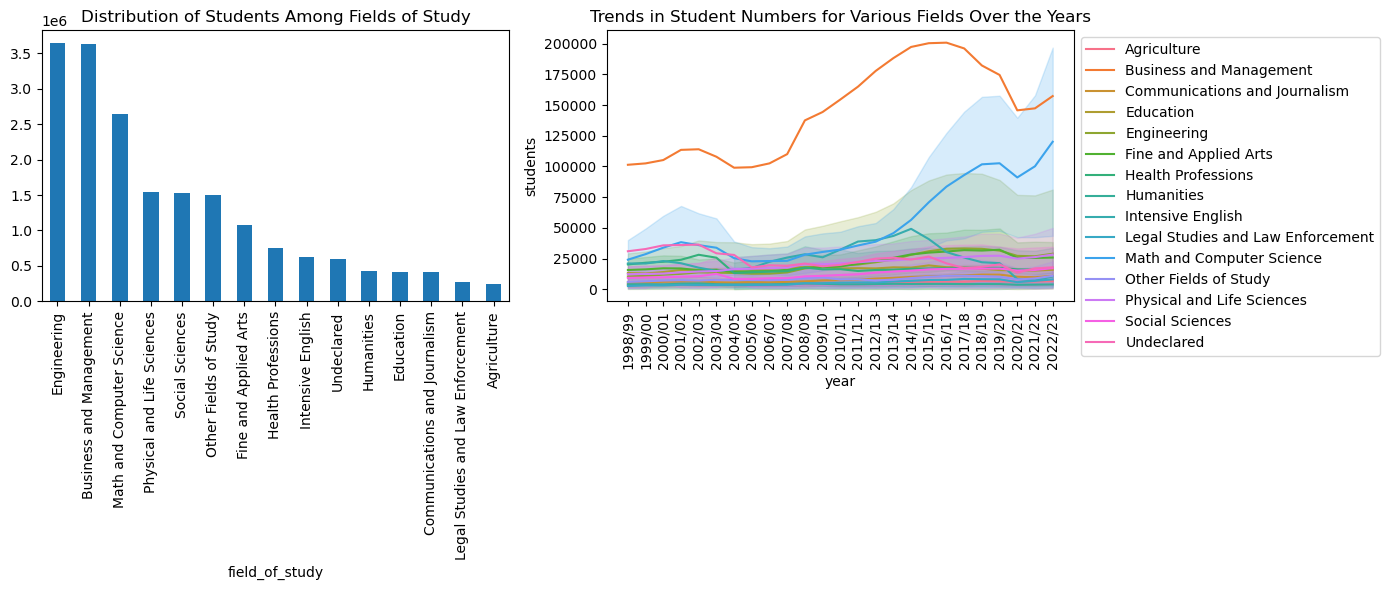

In [48]:
# Visualizations
plt.figure(figsize=(14, 6))

# Distribution of students among different fields of study
plt.subplot(1, 2, 1)
students_per_field = field_of_study_df.groupby('field_of_study')['students'].sum().sort_values(ascending=False)
students_per_field.plot(kind='bar')
plt.title('Distribution of Students Among Fields of Study')
plt.xticks(rotation=90)

# Trends in student numbers for various fields over the years
plt.subplot(1, 2, 2)
sns.lineplot(data=field_of_study_df, x='year', y='students', hue='field_of_study')
plt.title('Trends in Student Numbers for Various Fields Over the Years')
plt.xticks(rotation=90)
plt.legend(loc='upper left', bbox_to_anchor=(1, 1))

plt.tight_layout()
plt.savefig('distribution1.png')
plt.show()  


In [37]:
import plotly.graph_objects as go
import plotly.express as px

# Preparing data for the bubble chart
bubble_data = field_of_study_df.groupby('field_of_study')['students'].sum().reset_index()

# Creating the bubble chart with different colors and outlines
fig = px.scatter(bubble_data, x='field_of_study', y='students', size='students', hover_name='field_of_study', color='field_of_study', size_max=60)
fig.update_traces(marker=dict(line=dict(width=2, color='DarkSlateGrey')))
fig.update_layout(title='Distribution of Students Among Fields of Study', xaxis_title='Field of Study', yaxis_title='Number of Students')
fig.show()

# Preparing data for the Sankey chart
# Creating a list of all unique years and fields of study
labels = list(field_of_study_df['year'].unique()) + list(field_of_study_df['field_of_study'].unique())

# Creating a dictionary to map labels to indices
label_dict = {label: i for i, label in enumerate(labels)}

# Replacing the year and field of_study with their corresponding indices
sankey_data = field_of_study_df.copy()
sankey_data['source'] = sankey_data['year'].map(label_dict)
sankey_data['target'] = sankey_data['field_of_study'].map(label_dict)

# Preparing data for the Sankey chart
# Filter the data to include only the last 5 years
last_5_years = field_of_study_df['year'].sort_values(ascending=False).unique()[:5]
filtered_data = field_of_study_df[field_of_study_df['year'].isin(last_5_years)]

# Get the top 5 most popular fields of study in the last 5 years
top_5_fields = filtered_data.groupby('field_of_study')['students'].sum().nlargest(5).index
filtered_data = filtered_data[filtered_data['field_of_study'].isin(top_5_fields)]

# Creating a list of all unique years and fields of study
labels = list(filtered_data['year'].unique()) + list(filtered_data['field_of_study'].unique())

# Creating a dictionary to map labels to indices
label_dict = {label: i for i, label in enumerate(labels)}

# Replacing the year and field of study with their corresponding indices
sankey_data = filtered_data.copy()
sankey_data['source'] = sankey_data['year'].map(label_dict)
sankey_data['target'] = sankey_data['field_of_study'].map(label_dict)

# Creating the Sankey chart
fig = go.Figure(data=[go.Sankey(
    node=dict(
        pad=15,
        thickness=20,
        line=dict(color='black', width=0.5),
        label=labels
    ),
    link=dict(
        source=sankey_data['source'],
        target=sankey_data['target'],
        value=sankey_data['students']
    )
)])

fig.update_layout(title_text='Trends in Student Numbers for Top 5 Fields Over the Last 5 Years')
fig.show()


In [38]:
import plotly.express as px

# Preparing data for the animated bar chart
animated_bar_data = field_of_study_df.groupby(['year', 'field_of_study'])['students'].sum().reset_index()

# Creating the animated bar chart
fig = px.bar(animated_bar_data, x='field_of_study', y='students', color='field_of_study', animation_frame='year', animation_group='field_of_study', range_y=[0, animated_bar_data['students'].max()])
fig.update_layout(title='Trends in Student Numbers for Various Fields Over the Years', xaxis_title='Field of Study', yaxis_title='Number of Students')
fig.show()


In [39]:
origin_df = pd.read_csv('origin.csv')

# Display the first few rows of the dataset
origin_df.head()

,year,origin_region,origin,academic_type,students
0,2000/01,"Africa, Subsaharan","Africa, Subsaharan, Unspecified",Graduate,2
1,2000/01,"Africa, Subsaharan","Africa, Subsaharan, Unspecified",Other,0
2,2000/01,"Africa, Subsaharan","Africa, Subsaharan, Unspecified",Undergraduate,6
3,2000/01,Asia,"Asia, Unspecified",Graduate,0
4,2000/01,Asia,"Asia, Unspecified",Other,6


In [40]:

# Identifying the top contributing regions
top_regions = origin_df.groupby('origin_region')['students'].sum().sort_values(ascending=False).head(5).index

# Filtering the dataset for only the top regions
top_regions_df = origin_df[origin_df['origin_region'].isin(top_regions)]

# Preparing data for distribution visualization
distribution_data = [top_regions_df[top_regions_df['origin_region'] == region].groupby('year')['students'].sum() for region in top_regions]

# Distribution of students from top regions (Bar Plot)
fig = go.Figure()
for region, data in zip(top_regions, distribution_data):
    fig.add_trace(go.Bar(name=region, x=data.index, y=data, marker_line_color='black', marker_line_width=1.5))
fig.update_layout(title='Distribution of Students from Top Regions', xaxis_title='Year', yaxis_title='Number of Students', barmode='group')
fig.show()  

# Preparing data for trend visualization
trend_data = [top_regions_df[top_regions_df['origin_region'] == region].groupby('year')['students'].sum().cumsum() for region in top_regions]

# Trends in student numbers from top regions over the years (Stack Plot)
fig = go.Figure()
for i, (region, data) in enumerate(zip(top_regions, trend_data)):
    fig.add_trace(go.Scatter(name=region, x=data.index, y=data, fill='tonexty' if i > 0 else 'tozeroy'))
fig.update_layout(title='Trends in Student Numbers from Top Regions Over the Years', xaxis_title='Year', yaxis_title='Cumulative Number of Students')
fig.show() 


In [41]:
# Load the 'source_of_fund.csv' dataset
source_of_fund_df = pd.read_csv('source_of_fund.csv')

# Display the first few rows of the dataset
source_of_fund_df.head()


,year,academic_type,source_type,source_of_fund,students
0,1999/00,Undergraduate,International,Personal and Family,201578
1,1999/00,Undergraduate,International,Foreign Government or University,9742
2,1999/00,Undergraduate,International,Foreign Private Sponsor,6245
3,1999/00,Undergraduate,International,International Organization,749
4,1999/00,Undergraduate,U.S.,Current Employment,749


In [42]:
import pandas as pd
from scipy.stats import chi2_contingency
# Merging datasets (modify as needed based on actual dataset structure)
merged_df = pd.merge(origin_df, field_of_study_df, on='year')

# Creating a contingency table
contingency_table = pd.crosstab(merged_df['origin_region'], merged_df['field_of_study'])

# Performing Chi-square test
chi2, p, dof, expected = chi2_contingency(contingency_table)
print(f"Chi-square value: {chi2}, p-value: {p}")


Chi-square value: 0.0, p-value: 1.0


In [43]:
# Creating a contingency table for funding sources
contingency_fund = pd.crosstab(source_of_fund_df['source_type'], source_of_fund_df['source_of_fund'])

# Performing Chi-square test
chi2_fund, p_fund, dof_fund, expected_fund = chi2_contingency(contingency_fund)
print(f"Chi-square value: {chi2_fund}, p-value: {p_fund}")


Chi-square value: 1602.0000000000002, p-value: 0.0


In [44]:
!pip install pymannkendall
import pymannkendall as mk
field = 'Engineering'  # Replace with the field of interest
field_data = field_of_study_df[field_of_study_df['field_of_study'] == field]

# Mann-Kendall trend test
result = mk.original_test(field_data['students'])
print(f"Trend: {result.trend}, p-value: {result.p}")


Trend: no trend, p-value: 0.5416170687507547


Association Between Region of Origin and Field of Study:

Chi-square value: 0.0

p-value: 1.0

Interpretation: This result suggests that there is no statistically significant association between the region of origin and the field of study. With a p-value of 1.0, we fail to reject the null hypothesis, indicating that the distribution of fields of study is likely similar across different regions.

Different Funding Sources for US vs. International Students:

Chi-square value: 1602.0
p-value: 0.0

Interpretation: This result indicates a significant difference in the distribution of funding sources between US and international students. The extremely low p-value (essentially zero) leads us to reject the null hypothesis, suggesting that funding sources are indeed distributed differently between these two groups.

Decline in Popularity of Certain Fields of Study (Example: Engineering):

Trend: No trend

p-value: 0.5416

Interpretation: The Mann-Kendall test indicates no significant trend in the popularity of the selected field of study (Engineering in this case). With a p-value greater than 0.05, we fail to reject the null hypothesis, suggesting that there is no statistically significant trend in the number of students in this field over the years analyzed.

Overall Conclusion:
There seems to be no relationship between students' regions of origin and their chosen fields of study.
There is a significant difference in funding sources between US and international students.
For the specific field analyzed (Engineering), there is no significant trend in popularity over the years.

In [45]:
import pandas as pd

# Merge datasets on a common column (e.g., 'year')
merged_df = pd.merge(origin_df, field_of_study_df, on='year')


In [46]:
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline

# Selecting relevant features
features = merged_df[['origin_region', 'field_of_study']]
# Handling categorical variables
preprocessor = ColumnTransformer(
    transformers=[
        ('cat', OneHotEncoder(), ['origin_region', 'field_of_study'])
    ])

# Fit and transform the features
features_transformed = preprocessor.fit_transform(features)


In [47]:
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt

# Elbow method to find the optimal number of clusters
wcss = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters=i, init='k-means++', random_state=42)
    kmeans.fit(features_transformed)
    wcss.append(kmeans.inertia_)

# Plotting the results of the elbow method
plt.plot(range(1, 11), wcss)
plt.title('Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.show()


KeyboardInterrupt: 

In [ ]:
# Choosing the number of clusters based on the elbow plot
num_clusters = 6  

# Performing K-means clustering
kmeans = KMeans(n_clusters=num_clusters, init='k-means++', random_state=42)
clusters = kmeans.fit_predict(features_transformed)


In [ ]:
# Adding cluster labels to the original data
merged_df['Cluster'] = clusters
# Analyze clusters
print(merged_df.groupby('Cluster')[['origin_region', 'field_of_study']].value_counts())


Cluster  origin_region                field_of_study                   
0        Caribbean                    Physical and Life Sciences           6327
         Oceania                      Physical and Life Sciences           5394
         West Africa                  Physical and Life Sciences           4644
         Caribbean                    Communications and Journalism        4218
                                      Legal Studies and Law Enforcement    4218
                                                                           ... 
5        North America                Humanities                            344
         Africa, Subsaharan           Humanities                            344
         Stateless                    Humanities                            344
         Latin America and Caribbean  Humanities                            312
         Asia                         Humanities                            312
Name: count, Length: 285, dtype: int64
